# Problem 1: Importance of likelihood selection.
Consider an experimental setup where we can present an N-dimensional stimulus x ∈ RN that elicits a response in a recorded neural population. For one of these neurons, assume that we measure a response r(x) for a neuron with a tuning curve g that is defined as the number of spikes in 1 s after the presentation of the stimulus. A common model for the response distribution of this neuron is the Poisson model where the response r is distributed as P(r|x) = Poisson(e^⟨g,x⟩) where ⟨g,x⟩ denotes the inner product between two vectors.

##Part C
Now use the actual known likelihood (in this case) to estimate g by setting up an optimization program using likelihood defined above. You should focus on defining the minimization program and then using the fminunc function in MATLAB.
Infer the tuning curve using M = N samples. How accurate are the curves? What about for M = 2N? M = N/2? Plot the estimates from Part C and Part B together. What do you notice about the estimates as the number of samples gets large?

For M: 100
For N: 100


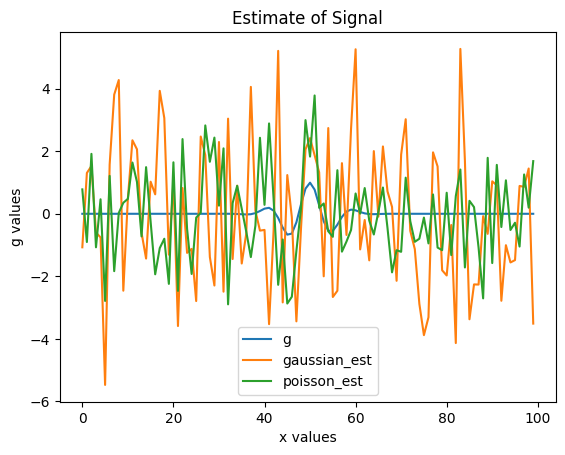

For M: 200
For N: 100


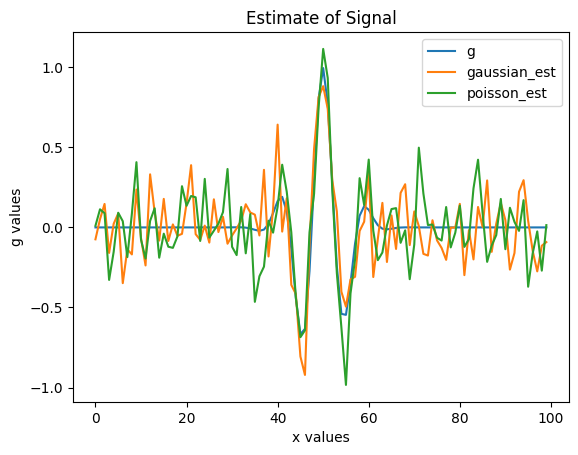

For M: 50
For N: 100


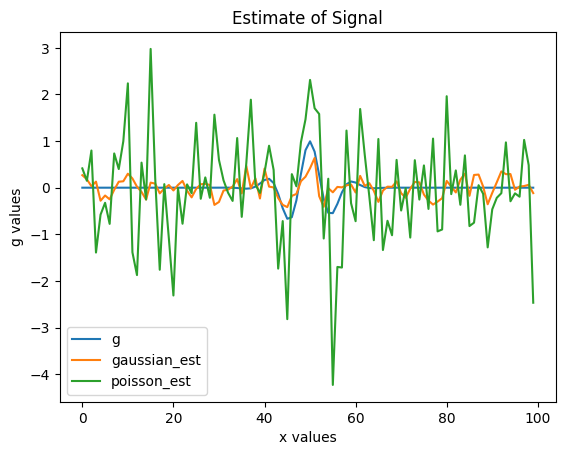

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import scipy
import numpy as np
import math
from scipy.optimize import minimize
from scipy.stats import poisson

# Solving for Poissons
def estimate_g(g, X, r_poisson):
  mean_response = np.exp(np.dot(X, g))
  return -np.sum(r_poisson * np.log(mean_response + 1e-10) - mean_response)

N_items = [100, 100, 100]
M_items = [100, 200, 50]
for h in range(3):
  N = N_items[h]
  M = M_items[h]
  cos_vals = np.linspace(0, N-1, N) / 10
  g = scipy.signal.windows.gaussian(N, std=5.0) * np.cos(2 * math.pi * cos_vals)

  # Generate samples
  X = []
  for i in range(M):
    X.append(2 * random.uniform(size=N))
  X = np.array(X)
  g = np.array(g)
  inner_product = np.matmul(X, g)

  ## Gaussian Case
  # Generate the response vector r with Gaussian noise / model
  # Set noise standard deviation
  sigma = 1
  noise = np.random.normal(0, sigma, M)
  #r_gauss = random.poisson(np.exp(inner_product)) + noise
  r_gauss = inner_product + noise

  # Solve for Gaussian estimate
  g_gaussian_estimate = np.linalg.lstsq(X, r_gauss, rcond=None)[0]

  ## Poisson Case
  # Generate response vector r assuming Poisson Likelihood
  r_poisson = random.poisson(np.exp(np.matmul(X, g)))

  # Solve for Poisson estimate
  g_initial = np.zeros(X.shape[1])
  poisson_estimate = minimize(estimate_g, g_initial, args=(X, r_poisson), method='L-BFGS-B').x # Alternative to fminunc

  # Plotting
  print("For M: " + str(M))
  print("For N: " + str(N))
  plt.figure()
  plt.plot(g, label="g")
  plt.plot(g_gaussian_estimate, label="gaussian_est")
  plt.plot(poisson_estimate, label="poisson_est")
  plt.xlabel('x values')
  plt.ylabel('g values')
  plt.title('Estimate of Signal')
  plt.legend()
  plt.show()

As the number of samples get larger, both the gaussian and poisson cases seem to be better able to estimate the true g signal. Having the number of features and samples equal makes the gaussian case wildly inaccurate while decreasing the number of samples relative the number of features appear to make the poisson estimate wildly inaccurate.